In [2]:
from tim_sort import tim_sort

import pandas as pd
import seaborn as sns
import numpy as np
import scipy
import matplotlib.pyplot as plt

from copy import copy
import tqdm.notebook as tq
import time
import random  

random.seed(4444)

In [46]:
data = []

# iterate through values of k from hypothesis (0 < k < 40)
for k in tq.tqdm(range(0, 40)):
    for n in range(1, 100, 10):
        # generate uniformly-distributed random lists of length n
        # with values between 0 and 1000
        rand_list = random.sample(range(1000), n)

        tim_measures = []

        # measure 7 times and keep the minimum value
        # this accounts for possible effects of other 
        # system processes
        for _ in range(7):
            tim_time = 0

            # we use process_time since it accounts for sleep
            # https://stackoverflow.com/a/52228375
            a = time.process_time_ns()
            # sample 1000 times
            for _ in range(1000):
                tim_list = copy(rand_list)
                tim_sort(tim_list, k)
            b = time.process_time_ns()

            tim_time += b - a

            tim_measures.append(tim_time)
        # store minimum value across measurements
        data.append({
            'n': n,
            'k': k,
            'tim_sort_time': min(tim_measures)
        })
        
df_tim = pd.DataFrame(data)

  0%|          | 0/40 [00:00<?, ?it/s]

<AxesSubplot:xlabel='k', ylabel='Time over 1000 iterations over all n (ns)'>

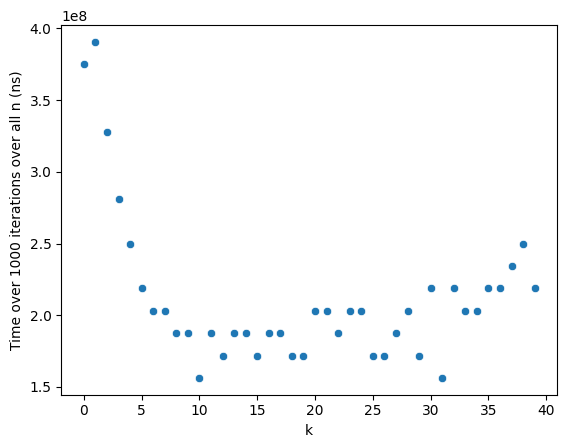

In [111]:
plt.xlabel("k")
plt.ylabel("Time over 1000 iterations over all n (ns)")


sns.scatterplot(df_tim.groupby('k').sum('tim_sort_time'), x='k', y='tim_sort_time')

In [97]:
# from above, it looks like k_min = 10 and k_min = 31
# lets be more precise with our n measurements when k = 10, 31

data = []

for k in [10, 31]:
    for n in tq.tqdm(range(1, 100)):
        # generate uniformly-distributed random lists of length n
        # with values between 0 and 1000
        rand_list = random.sample(range(1000), n)

        tim_measures = []

        # measure 7 times and keep the minimum value
        # this accounts for possible effects of other 
        # system processes
        for _ in range(7):
            tim_time = 0

            # we use process_time since it accounts for sleep
            # https://stackoverflow.com/a/52228375
            a = time.process_time_ns()
            # sample 1000 times
            for _ in range(10000):
                tim_list = copy(rand_list)
                tim_sort(tim_list, k)
            b = time.process_time_ns()

            tim_time += b - a

            tim_measures.append(tim_time)
        # store minimum value across measurements
        data.append({
            'n': n,
            'k': k,
            'tim_sort_time': min(tim_measures)
        })

df_tim_2 = pd.DataFrame(data)

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

In [99]:
df_tim_2

,n,k,tim_sort_time
0,1,10,0
1,2,10,0
2,3,10,0
3,4,10,0
4,5,10,0
...,...,...,...
193,95,31,640625000
194,96,31,640625000
195,97,31,625000000
196,98,31,687500000


In [100]:
df_tim_2.to_csv('q2-df_tim_2.csv')

<AxesSubplot:xlabel='n', ylabel='Time over 10000 iterations (ns)'>

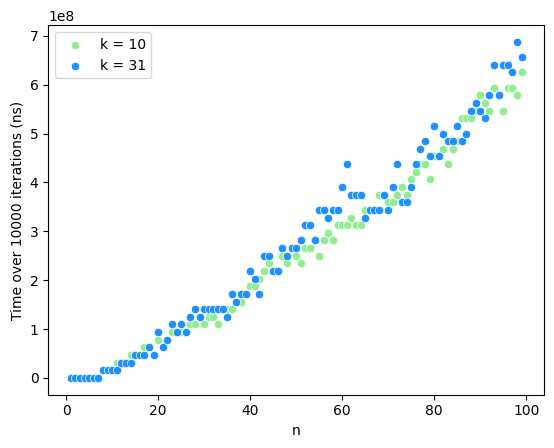

In [109]:
plt.xlabel("n")
plt.ylabel("Time over 10000 iterations (ns)")


sns.scatterplot(df_tim_2[df_tim_2['k'] == 10], x='n', y='tim_sort_time', color='lightgreen', label='k = 10')
sns.scatterplot(df_tim_2[df_tim_2['k'] == 31], x='n', y='tim_sort_time', color='dodgerblue', label='k = 31')


In [7]:
df = pd.read_csv('../results/q1/q1.csv')

In [5]:
# fit merge_sort against n log n regression using least squares
# adapted from https://stackoverflow.com/a/3433503
merge_sort_params, _ = scipy.optimize.curve_fit(lambda t, a, b: a + b * t * np.log(t), df['n'], df['merge_sort_time'])

In [6]:
# fit insertion_sort to a 2nd degree polynomial
insertion_sort_params = np.polyfit(df['n'], df['insertion_sort_time'], 2)

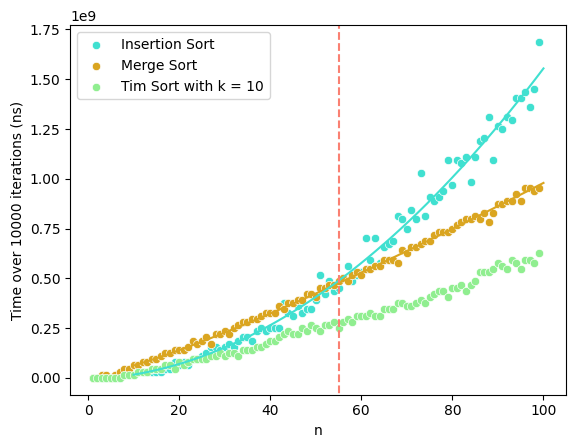

In [107]:
sns.scatterplot(df, x='n', y='insertion_sort_time', color='turquoise', label='Insertion Sort')
sns.scatterplot(df, x='n', y='merge_sort_time', color='goldenrod', label='Merge Sort')
sns.scatterplot(df_tim_2[df_tim_2['k'] == 10], x='n', y='tim_sort_time', color='lightgreen', label='Tim Sort with k = 10')

# draw merge_sort fit
t = np.linspace(10, 100)
y = merge_sort_params[0] + merge_sort_params[1] * t * np.log(t)
sns.lineplot(x=t, y=y, color='goldenrod')

# draw insertion_sort fit
y = insertion_sort_params[0] * t**2 + insertion_sort_params[1] * t + insertion_sort_params[2]
sns.lineplot(x=t, y=y, color='turquoise')

plt.xlabel("n")
plt.ylabel("Time over 10000 iterations (ns)")

# approximatge intersection manually and graph it
plt.axvline(55, 10, 0, color='salmon', ls='--')